# Acess Gaia (astroquery.vizier)

# Cone search

This query performs a cone search centered at the specified RA/Dec coordinates or object name with the provided radius argument.

In [5]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.vizier import Vizier

v = Vizier(columns=["**", "+_r"])
v.ROW_LIMIT = -1


Gaia_comp = v.query_region("Pleiades", radius='1d',catalog="I/350/gaiaedr3")
PD = Gaia_comp[0].to_pandas() #converting the table to pandas datafame


27078


In [6]:
print("Number of stars in the 1 degree FOV of Pleiades = ",len(PD))

Number of stars in the 1 degree FOV of Pleiades =  27078


In [48]:
print(list(PD.columns))

['_r', 'EDR3Name', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Source', 'SolID', 'RandomI', 'Epoch', 'Plx', 'e_Plx', 'RPlx', 'PM', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'RADEcor', 'RAPlxcor', 'RApmRAcor', 'RApmDEcor', 'DEPlxcor', 'DEpmRAcor', 'DEpmDEcor', 'PlxpmRAcor', 'PlxpmDEcor', 'pmRApmDEcor', 'NAL', 'NAC', 'NgAL', 'NbAL', 'gofAL', 'chi2AL', 'epsi', 'sepsi', 'Solved', 'APF', 'nueff', 'pscol', 'e_pscol', 'RApscolCorr', 'DEpscolCorr', 'PlxpscolCorr', 'pmRApscolCorr', 'pmDEpscolCorr', 'MatchObsA', 'Nper', 'amax', 'MatchObs', 'NewMatchObs', 'MatchObsrm', 'IPDgofha', 'IPDgofhp', 'IPDfmp', 'IPDfow', 'RUWE', 'SDSk1', 'SDSk2', 'SDSk3', 'SDSk4', 'SDMk1', 'SDMk2', 'SDMk3', 'SDMk4', 'Dup', 'o_Gmag', 'FG', 'e_FG', 'RFG', 'Gmag', 'e_Gmag', 'o_BPmag', 'FBP', 'e_FBP', 'RFBP', 'BPmag', 'e_BPmag', 'o_RPmag', 'FRP', 'e_FRP', 'RFRP', 'RPmag', 'e_RPmag', 'NBPcont', 'NBPblend', 'NRPcont', 'NRPblend', 'Mode', 'E_BP_RP_', 'BP-RP', 'BP-G', 'G-RP', 'RVDR2', 'e_RVDR2', 'o_RVDR2', 'Tefftemp', 'loggtemp', 


# Plot the Sky coordinates using matplotlib

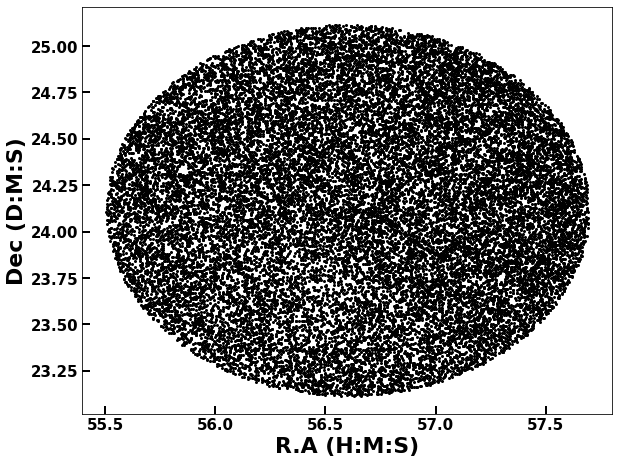

In [16]:
import matplotlib.pyplot as plt

plt.plot(PD.RA_ICRS,PD.DE_ICRS,'ko',ms=2)



plt.xlabel("R.A (H:M:S)",fontsize=22,fontweight='bold')
plt.ylabel("Dec (D:M:S)",fontsize=22,fontweight='bold')

plt.tick_params(direction='in', which ="major",labelsize = 15,length=8, width=2, colors='k',grid_color='k', grid_alpha=0.5)
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')

fig2 =plt.gcf()
fig2.set_size_inches(9.5, 7.5)



# Vector Point Diagram

No handles with labels found to put in legend.


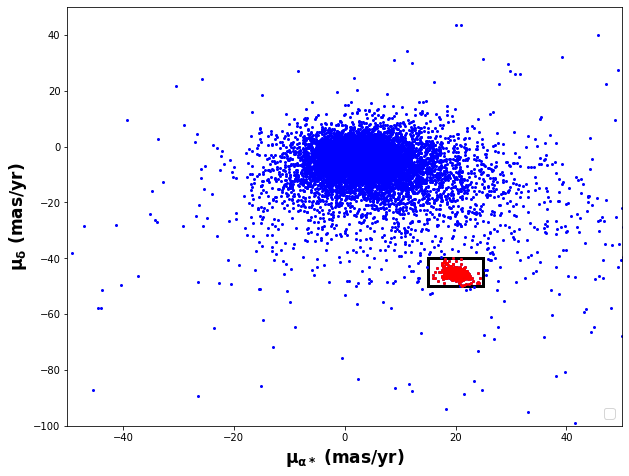

In [31]:
plt.plot(PD.pmRA,PD.pmDE,'bo',ms=2)





x1, y1 = 15, -50
x2, y2 = 25, -40

# Draw the rectangle
plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, color='k',linewidth=3))



subset = PD[(PD['pmRA'] >= x1) & (PD['pmRA'] <= x2) & (PD['pmDE'] >= y1) & (PD['pmDE'] <= y2)]

# Plot the subset in a different color
plt.plot(subset.pmRA,subset.pmDE,'ro',ms=2)




params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
plt.xlabel("$\mu_{\\alpha *}$ (mas/yr)",fontsize=17,fontweight='bold')
plt.ylabel("$\mu_{\delta}$ (mas/yr)",fontsize=17,fontweight='bold')
plt.legend(prop={'size': 14,'weight':'bold'}, ncol=1,loc=4)
plt.xlim(-50,50)
plt.ylim(-100,50)
plt.tight_layout()
fig2 =plt.gcf()
fig2.set_size_inches(9.5, 7.5)

# Histrogram

No handles with labels found to put in legend.


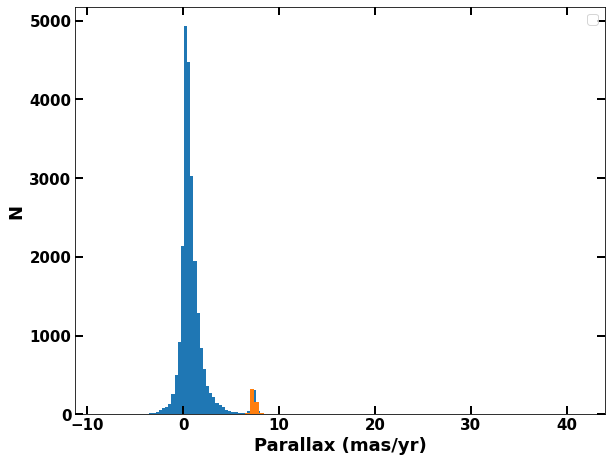

In [37]:
plt.hist(PD.Plx,bins='sqrt')

plt.hist(subset.Plx,bins='sqrt')
plt.tick_params(direction='in', which ="major",labelsize = 15,length=8, width=2, 
                   colors='k',grid_color='k', grid_alpha=1,bottom=True, top=True, left=True, right=True)
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')
plt.legend(prop={'size': 14,'weight':'bold'}, ncol=1)
plt.xlabel("Parallax (mas/yr)",fontsize=18,fontweight='bold')
plt.ylabel("N",fontsize=18,fontweight='bold')
fig2 =plt.gcf()
fig2.set_size_inches(9.5, 7.5)

No handles with labels found to put in legend.


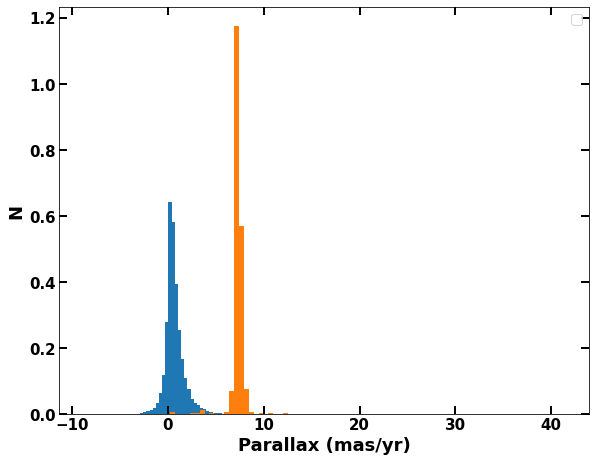

In [39]:
plt.hist(PD.Plx,bins='sqrt',density=True)

plt.hist(subset.Plx,bins='sqrt',density=True)
plt.tick_params(direction='in', which ="major",labelsize = 15,length=8, width=2, 
                   colors='k',grid_color='k', grid_alpha=1,bottom=True, top=True, left=True, right=True)
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')
plt.legend(prop={'size': 14,'weight':'bold'}, ncol=1)
plt.xlabel("Parallax (mas/yr)",fontsize=18,fontweight='bold')
plt.ylabel("N",fontsize=18,fontweight='bold')
fig2 =plt.gcf()
fig2.set_size_inches(9.5, 7.5)

In [41]:
import numpy as np

distance = 1000/subset.Plx
print(np.mean(distance)," pc")

150.08095699967888  pc


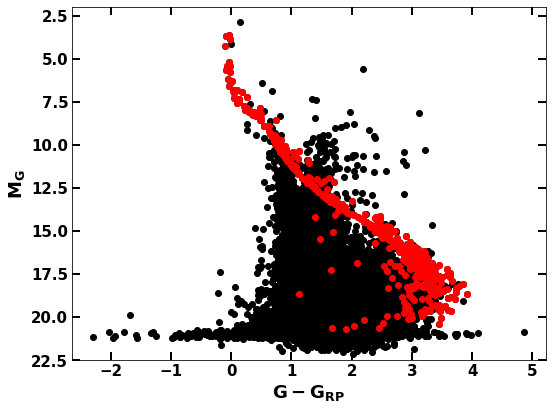

In [47]:
plt.plot(PD.BPmag - PD.RPmag, PD.Gmag,'ko')

plt.plot(subset.BPmag - subset.RPmag, subset.Gmag,'ro')


plt.tick_params(direction='in', which ="major",labelsize = 15,length=8, width=2, colors='k',
                grid_color='k', grid_alpha=0.5,bottom=True, top=True, left=True, right=True)
plt.xticks(weight = 'bold')
plt.yticks(weight = 'bold')

plt.xlabel('$G-G_{RP}$',fontsize=18,fontweight='bold')
plt.ylabel('$M_{G}$',fontsize=18,fontweight='bold')
plt.ylim(22.5,2)

fig2 =plt.gcf()
fig2.set_size_inches(8.5, 6.5)

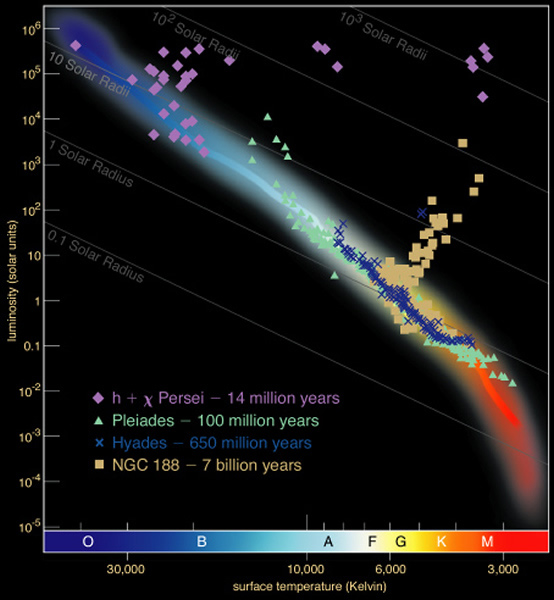

In [ ]:
VI